# Problem 1

First 5 rows of dataset:
         X1        X2        X3         Y
0  0.000000  3.440000  0.440000  4.387545
1  0.040404  0.134949  0.888485  2.679650
2  0.080808  0.829899  1.336970  2.968490
3  0.121212  1.524848  1.785455  3.254065
4  0.161616  2.219798  2.233939  3.536375 

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      100 non-null    float64
 1   X2      100 non-null    float64
 2   X3      100 non-null    float64
 3   Y       100 non-null    float64
dtypes: float64(4)
memory usage: 3.3 KB
None 

Summary statistics:
               X1          X2          X3           Y
count  100.000000  100.000000  100.000000  100.000000
mean     2.000000    2.000000    1.960000    1.851276
std      1.172181    1.172154    1.163005    2.774643
min      0.000000    0.070303    0.027879   -5.332455
25%      1.000000    0.979394    0.952121    

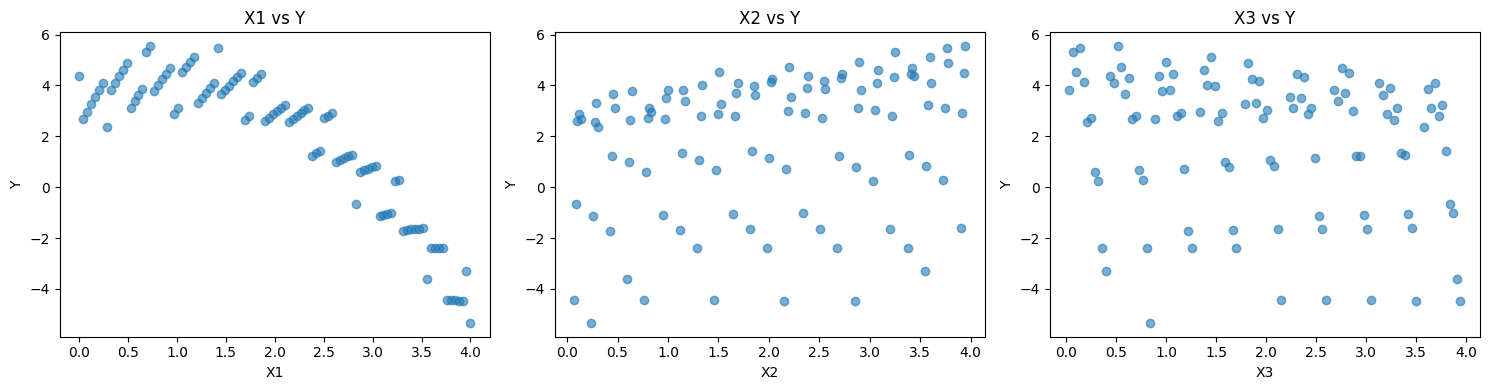

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load with header
data = pd.read_csv("D3.csv")

print("First 5 rows of dataset:")
print(data.head(), "\n")

print("Dataset info:")
print(data.info(), "\n")

print("Summary statistics:")
print(data.describe(), "\n")

# Scatter plots
plt.figure(figsize=(15,4))

for i, col in enumerate(["X1", "X2", "X3"], 1):
    plt.subplot(1, 3, i)
    plt.scatter(data[col], data["Y"], alpha=0.6)
    plt.xlabel(col)
    plt.ylabel("Y")
    plt.title(f"{col} vs Y")

plt.tight_layout()
plt.show()


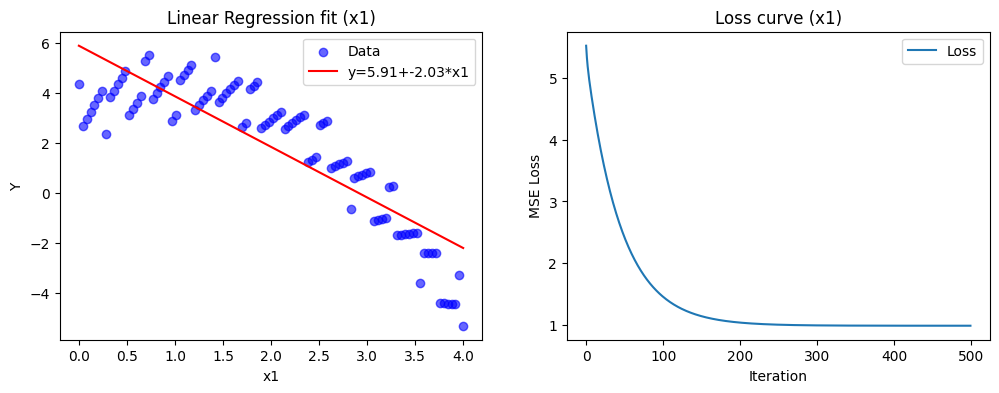

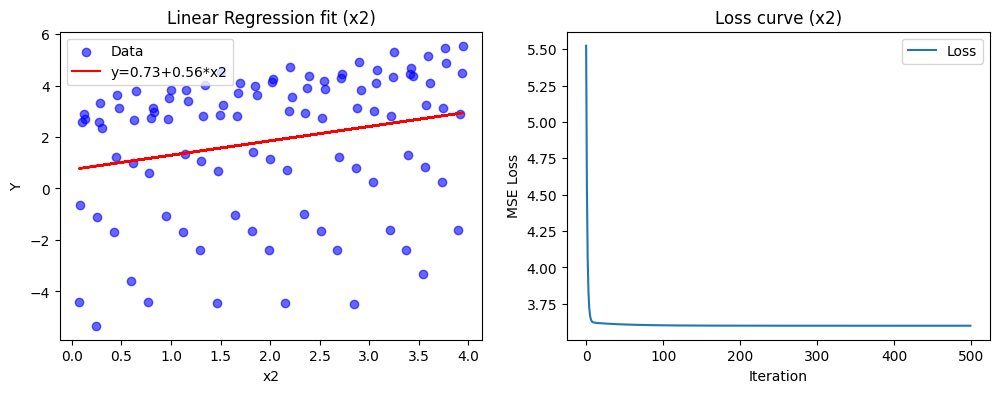

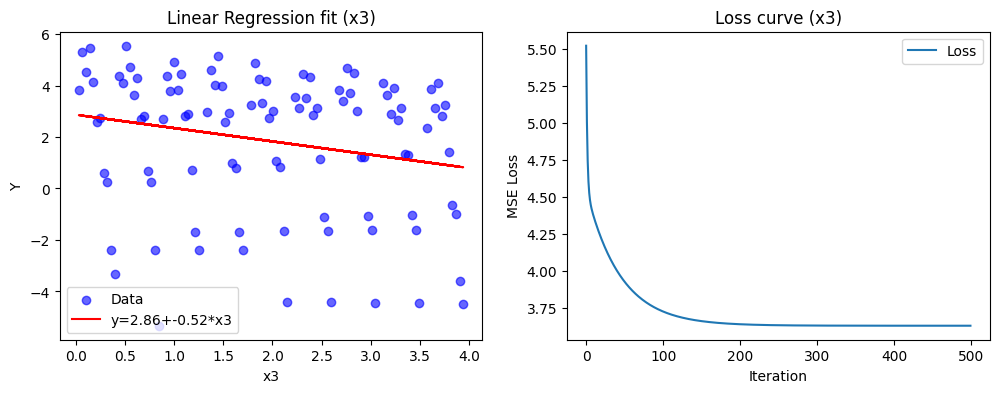


Final models:
x1: Y ≈ 5.9057 + -2.0297 * x1, Final Loss = 0.985058
x2: Y ≈ 0.7343 + 0.5583 * x2, Final Loss = 3.599366
x3: Y ≈ 2.8621 + -0.5168 * x3, Final Loss = 3.629463

Best explanatory variable is **x1** with lowest loss = 0.985058


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Gradient descent for simple linear regression
def gradient_descent(X, Y, lr=0.05, epochs=1000):
    m = len(Y)
    theta0, theta1 = 0.0, 0.0
    losses = []

    for i in range(epochs):
        Y_pred = theta0 + theta1 * X
        error = Y_pred - Y
        cost = (1/(2*m)) * np.sum(error**2)
        losses.append(cost)

        d_theta0 = (1/m) * np.sum(error)
        d_theta1 = (1/m) * np.sum(error * X)

        theta0 -= lr * d_theta0
        theta1 -= lr * d_theta1

    return theta0, theta1, losses

# Load dataset with header
data = pd.read_csv("D3.csv")

# Extract variables
x1 = data["X1"].values
x2 = data["X2"].values
x3 = data["X3"].values
Y  = data["Y"].values

X_vars = {"x1": x1, "x2": x2, "x3": x3}
results = {}

# Run regression for each variable separately
for var_name, X in X_vars.items():
    theta0, theta1, losses = gradient_descent(X, Y, lr=0.05, epochs=500)

    results[var_name] = {"theta0": theta0, "theta1": theta1,
                         "loss": losses[-1], "losses": losses}

    # Plot regression line + loss curve
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.scatter(X, Y, color="blue", alpha=0.6, label="Data")
    plt.plot(X, theta0 + theta1 * X, color="red",
             label=f"y={theta0:.2f}+{theta1:.2f}*{var_name}")
    plt.title(f"Linear Regression fit ({var_name})")
    plt.xlabel(var_name)
    plt.ylabel("Y")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(len(losses)), losses, label="Loss")
    plt.xlabel("Iteration")
    plt.ylabel("MSE Loss")
    plt.title(f"Loss curve ({var_name})")
    plt.legend()
    plt.show()

# Compare results
print("\nFinal models:")
for var, res in results.items():
    print(f"{var}: Y ≈ {res['theta0']:.4f} + {res['theta1']:.4f} * {var}, "
          f"Final Loss = {res['loss']:.6f}")

best_var = min(results, key=lambda v: results[v]["loss"])
print(f"\nBest explanatory variable is **{best_var}** "
      f"with lowest loss = {results[best_var]['loss']:.6f}")


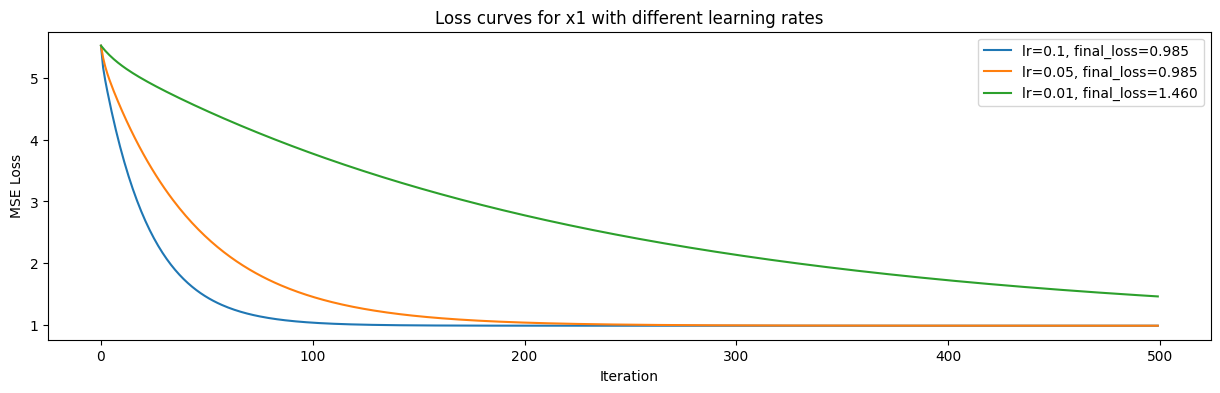

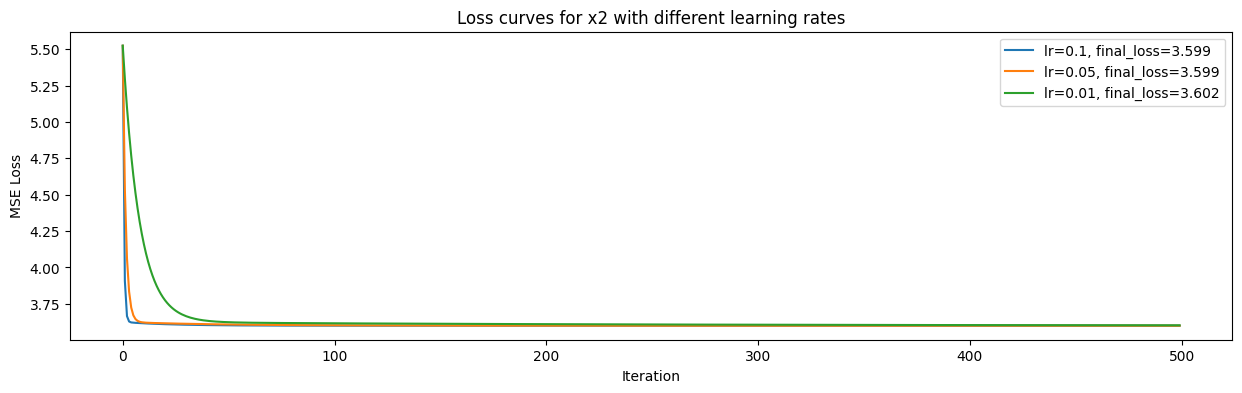

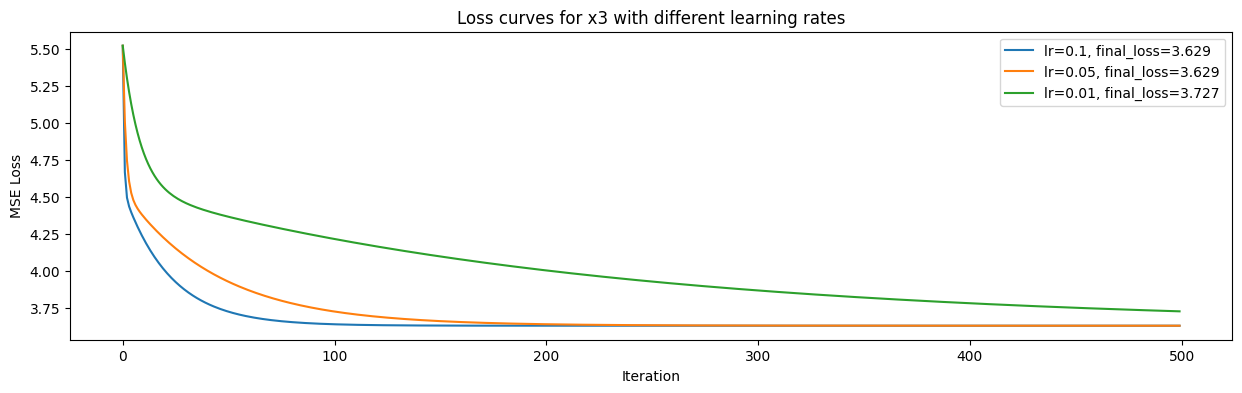


Final models and losses by learning rate:

Variable: x1
  lr=0.1: Y ≈ 5.9279 + -2.0383*x1, Final Loss=0.984993
  lr=0.05: Y ≈ 5.9057 + -2.0297*x1, Final Loss=0.985058
  lr=0.01: Y ≈ 4.0027 + -1.2890*x1, Final Loss=1.459971

Variable: x2
  lr=0.1: Y ≈ 0.7361 + 0.5576*x2, Final Loss=3.599366
  lr=0.05: Y ≈ 0.7343 + 0.5583*x2, Final Loss=3.599366
  lr=0.01: Y ≈ 0.5874 + 0.6155*x2, Final Loss=3.602199

Variable: x3
  lr=0.1: Y ≈ 2.8714 + -0.5205*x3, Final Loss=3.629451
  lr=0.05: Y ≈ 2.8621 + -0.5168*x3, Final Loss=3.629463
  lr=0.01: Y ≈ 2.0079 + -0.1790*x3, Final Loss=3.726831


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def gradient_descent(X, Y, lr=0.05, epochs=1000):
    m = len(Y)
    theta0, theta1 = 0.0, 0.0
    losses = []

    for i in range(epochs):
        Y_pred = theta0 + theta1 * X
        error = Y_pred - Y
        cost = (1/(2*m)) * np.sum(error**2)
        losses.append(cost)

        d_theta0 = (1/m) * np.sum(error)
        d_theta1 = (1/m) * np.sum(error * X)

        theta0 -= lr * d_theta0
        theta1 -= lr * d_theta1

    return theta0, theta1, losses

# Load dataset with header
data = pd.read_csv("D3.csv")
x1, x2, x3, Y = data["X1"].values, data["X2"].values, data["X3"].values, data["Y"].values

X_vars = {"x1": x1, "x2": x2, "x3": x3}
learning_rates = [0.1, 0.05, 0.01]   # values to explore
results = {}

for var_name, X in X_vars.items():
    results[var_name] = {}
    plt.figure(figsize=(15,4))

    for lr in learning_rates:
        theta0, theta1, losses = gradient_descent(X, Y, lr=lr, epochs=500)
        results[var_name][lr] = {"theta0": theta0, "theta1": theta1,
                                 "loss": losses[-1], "losses": losses}

        # Plot loss curve for each learning rate
        plt.plot(losses, label=f"lr={lr}, final_loss={losses[-1]:.3f}")

    plt.title(f"Loss curves for {var_name} with different learning rates")
    plt.xlabel("Iteration")
    plt.ylabel("MSE Loss")
    plt.legend()
    plt.show()

# Print summary
print("\nFinal models and losses by learning rate:")
for var, lr_dict in results.items():
    print(f"\nVariable: {var}")
    for lr, res in lr_dict.items():
        print(f"  lr={lr}: Y ≈ {res['theta0']:.4f} + {res['theta1']:.4f}*{var}, "
              f"Final Loss={res['loss']:.6f}")


# Problem 2

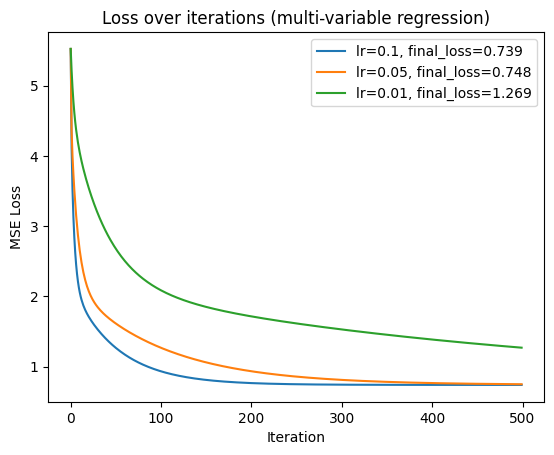


Final models by learning rate:
lr=0.1: Y ≈ 5.2795 + -1.9988*X1 + 0.5383*X2 + -0.2605*X3, Final Loss=0.738530
lr=0.05: Y ≈ 4.8873 + -1.9434*X1 + 0.6031*X2 + -0.2030*X3, Final Loss=0.748267
lr=0.01: Y ≈ 2.1613 + -1.5555*X1 + 1.0526*X2 + 0.1947*X3, Final Loss=1.269046

Best model uses lr=0.1:
Y ≈ 5.2795 + -1.9988*X1 + 0.5383*X2 + -0.2605*X3
Final Loss = 0.738530

Predictions:
X1=1, X2=1, X3=1 → Y ≈ 3.5585
X1=2, X2=0, X3=4 → Y ≈ 0.2398
X1=3, X2=2, X3=1 → Y ≈ 0.0991


In [11]:
def gradient_descent_multi(X, Y, lr=0.05, epochs=1000):
    """
    Linear regression with gradient descent (multivariate).
    X: (m, n) features
    Y: (m,) target
    """
    m, n = X.shape
    theta = np.zeros(n)
    losses = []

    for i in range(epochs):
        Y_pred = X.dot(theta)
        error = Y_pred - Y
        cost = (1/(2*m)) * np.sum(error**2)
        losses.append(cost)

        # gradient update
        d_theta = (1/m) * X.T.dot(error)
        theta -= lr * d_theta

    return theta, losses


X = data[["X1", "X2", "X3"]].values
Y = data["Y"].values

# (X0=1 for all rows)
X_b = np.c_[np.ones((X.shape[0], 1)), X]

learning_rates = [0.1, 0.05, 0.01]
results = {}

for lr in learning_rates:
    theta, losses = gradient_descent_multi(X_b, Y, lr=lr, epochs=500)
    results[lr] = {"theta": theta, "loss": losses[-1], "losses": losses}

    plt.plot(losses, label=f"lr={lr}, final_loss={losses[-1]:.3f}")

plt.title("Loss over iterations (multi-variable regression)")
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()
best_lr = min(results, key=lambda k: results[k]["loss"])
best_model = results[best_lr]
theta_best = best_model["theta"]

print("\nFinal models by learning rate:")
for lr, res in results.items():
    t = res["theta"]
    print(f"lr={lr}: Y ≈ {t[0]:.4f} + {t[1]:.4f}*X1 + {t[2]:.4f}*X2 + {t[3]:.4f}*X3, Final Loss={res['loss']:.6f}")

print(f"\nBest model uses lr={best_lr}:")
print(f"Y ≈ {theta_best[0]:.4f} + {theta_best[1]:.4f}*X1 + {theta_best[2]:.4f}*X2 + {theta_best[3]:.4f}*X3")
print(f"Final Loss = {best_model['loss']:.6f}")

new_points = np.array([[1,1,1],
                       [2,0,4],
                       [3,2,1]])

new_points_b = np.c_[np.ones((new_points.shape[0],1)), new_points]

predictions = new_points_b.dot(theta_best)

print("\nPredictions:")
for inp, pred in zip(new_points, predictions):
    print(f"X1={inp[0]}, X2={inp[1]}, X3={inp[2]} → Y ≈ {pred:.4f}")